## Problem

Implement the decision tree classification algorithm (training + inference).

- **Input**: X (shape N\*k, numerical), y (shape N\*1)
- **Output**: DecisionTree classifier

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
# data setup
X0 = np.random.normal(loc=0, scale=2, size=(15, 2))
X1 = np.random.normal(loc=5, scale=2, size=(15, 2))
X2 = np.random.normal(loc=10, scale=2, size=(20, 2))

y0 = np.zeros((15, 1))
y1 = np.ones((15, 1))
y2 = np.ones((20, 1)) * 2

X = np.vstack([X0, X1, X2])
y = np.vstack([y0, y1, y2]).flatten()

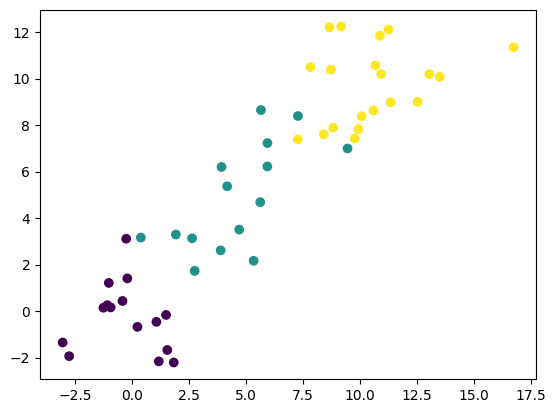

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Solution/Implementation

In [66]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=10, leaf_impurity_threshold=0.0001):
        self.max_depth = max_depth
        self.leaf_impurity_threshold = leaf_impurity_threshold
    
    def _gini_impurity(self, y):
        classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - np.prod([count / len(y) for count in counts])
        return impurity

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _split(self, X, feature_idx, decision_threshold):
        left_idx = []
        right_idx = []
        N = X.shape[0]
        for i in range(N):
            if X[i, feature_idx] < decision_threshold:
                left_idx.append(i)
            else:
                right_idx.append(i)
        return left_idx, right_idx

    def _best_split(self, X, y):
        N, n_features = X.shape
    
        best_impurity = self._gini_impurity(y)
        best_feature_idx = None
        best_decision_threshold = None
        best_left_idx = None
        best_right_idx = None

        for feature_idx in range(n_features):
            for decision_threshold in np.unique(X[:, feature_idx]):
                left_idx, right_idx = self._split(X, feature_idx, decision_threshold)
                left_impurity = self._gini_impurity(y[left_idx])
                right_impurity = self._gini_impurity(y[right_idx])
                impurity = (len(left_idx) * left_impurity + len(right_idx) * right_impurity) / len(y)
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature_idx = feature_idx
                    best_decision_threshold = decision_threshold
                    best_left_idx = left_idx
                    best_right_idx = right_idx
        return best_feature_idx, best_decision_threshold, best_left_idx, best_right_idx

    def _make_leaf_node(self, y):
        node = TreeNode()
        node.classification = Counter(y).most_common()[0][0]
        return node

    def _build_tree(self, X, y, depth=0):
        if depth == self.max_depth or self._gini_impurity(y) <= self.leaf_impurity_threshold:
            return self._make_leaf_node(y)
        
        # figure out the best split
        feature_idx, decision_threshold, left_idx, right_idx = self._best_split(X, y)
        X_left, y_left = X[left_idx], y[left_idx]
        X_right, y_right = X[right_idx], y[right_idx]
        node = TreeNode()

        # recurse
        if len(y_left) > 0:
            node.left = self._build_tree(X_left, y_left, depth=depth+1)
        
        if len(y_right) > 0:
            node.right = self._build_tree(X_right, y_right, depth=depth+1)
        
        node.feature_idx = feature_idx
        node.decision_threshold = decision_threshold
        return node

    def _predict(self, x):
        cur = self.tree
        while not cur.is_leaf_node():
            if x[cur.feature_idx] < cur.decision_threshold:
                cur = cur.left
            else:
                cur = cur.right
        return cur.classification

    def predict(self, X):
        N = X.shape[0]
        preds = np.zeros(N)
        for i in range(N):
            preds[i] = self._predict(X[i])
        return preds.astype(int)


class TreeNode:
    def __init__(self):
        self.left = None
        self.right = None
        self.feature_idx = None
        self.decision_threshold = None
        self.classification = None

    def is_leaf_node(self):
        return self.left is None and self.right is None

In [77]:
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X, y)

In [78]:
y_pred = classifier.predict(X)
acc = np.mean(y_pred == y)
print(f"Train set accuracy = {acc:.4f}")

Train set accuracy = 0.9600


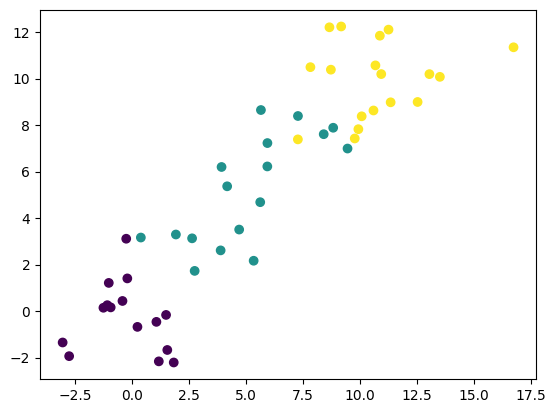

In [79]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()